## Import libraries

In [1]:
import quail
import seaborn as sns
import numpy as np
import rpy2
import pandas as pd

%matplotlib inline
%load_ext rpy2.ipython
sns.set_context("poster", font_scale=1.5)
sns.set_palette('husl')

## Load egg

In [2]:
import pickle
with open('../data/eggs/eggs_room1_042517_12345.p', 'rb') as f:
    eggs = pickle.load(f)
    
with open('../data/eggs/eggs_room2_042517_1678.p', 'rb') as f:
    eggs += pickle.load(f)

## Pop off random room 2 subjects

In [3]:
rand_room2 = eggs.pop(5)
# rand_room1 = eggs.pop(0)
# random = quail.stack_eggs([rand_room1, rand_room2])
# eggs.insert(0, random)

## Count subjects and create `subjgroup`

In [4]:
experiment_names = ['random', 'category', 'color', 'length', 'start let', 'location']# 'f-nf','nf-f']
subjnums = [len(egg.pres.index.levels[0].values) for egg in eggs[:len(experiment_names)]]

for experiment_name, experiment_n in zip(experiment_names, subjnums):
    print('Experiment name: ' + experiment_name + ', Count: ' + str(experiment_n))

subjgroup = []
for experiment_name, experiment_n in zip(experiment_names, subjnums):
    subjgroup+=[experiment_name]*experiment_n 

Experiment name: random, Count: 26
Experiment name: category, Count: 21
Experiment name: color, Count: 20
Experiment name: length, Count: 23
Experiment name: start let, Count: 20
Experiment name: location, Count: 21


## Stack eggs

In [5]:
egg_all = quail.stack_eggs(eggs[:len(experiment_names)])
egg_all.info()

Number of subjects: 131
Number of lists per subject: 16
Number of words per list: 16
Date created: Wed Apr 26 15:15:45 2017
Meta data: {}


## Plot accuracy for each experiment, averaged over subjects

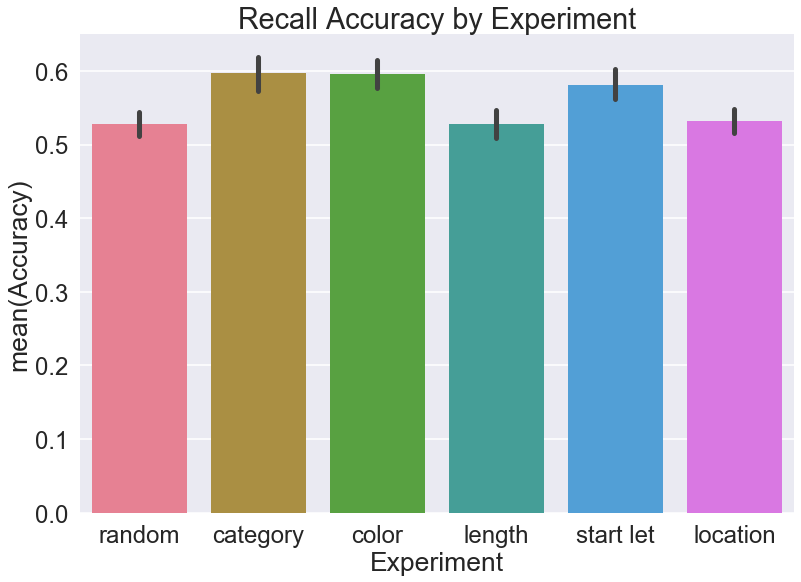

In [6]:
analyzed_egg = quail.analyze(egg_all, analysis='accuracy')

for plot_style in ['bar']:
    quail.plot(analyzed_egg, plot_type='subject', plot_style=plot_style, 
               subjgroup=subjgroup, subjname='Experiment', title='Recall Accuracy by Experiment')

## Plot baseline corrected accuracy for just the first 8 lists

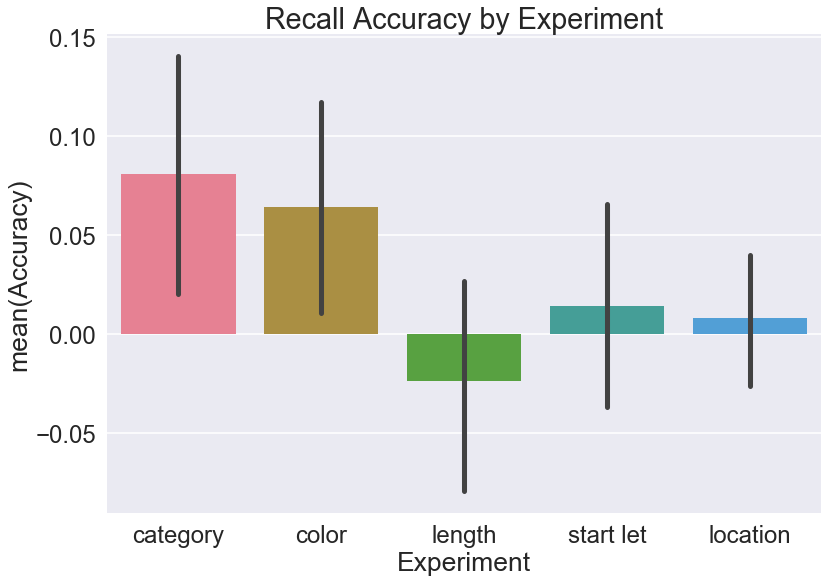

In [7]:
egg_firsthalf = quail.crack_egg(egg_all, lists=range(8))
analyzed_egg = quail.analyze(egg_firsthalf, analysis='accuracy', listgroup=['average']*8)

baseline_egg = analyzed_egg - analyzed_egg[0].values[[subj=='random' for subj in subjgroup]].mean()
baseline_egg = baseline_egg.loc[26:]
baseline_egg.analysis_type='accuracy'
subjgroup_baseline = [sub for sub in subjgroup if sub!='random']

quail.plot(baseline_egg, plot_type='subject', plot_style='bar', 
           subjgroup=subjgroup_baseline, subjname='Experiment', title='Recall Accuracy by Experiment')

In [8]:
from scipy.stats import ttest_1samp

for condition in pd.Series(subjgroup_baseline).unique():
    print(condition, ttest_1samp(baseline_egg.iloc[list(np.where([sub==condition for sub in subjgroup_baseline])[0])],0))

('category', Ttest_1sampResult(statistic=array([ 2.58662059]), pvalue=array([ 0.0176294])))
('color', Ttest_1sampResult(statistic=array([ 2.36156213]), pvalue=array([ 0.02902966])))
('length', Ttest_1sampResult(statistic=array([-0.84742848]), pvalue=array([ 0.4058815])))
('start let', Ttest_1sampResult(statistic=array([ 0.52127264]), pvalue=array([ 0.60819984])))
('location', Ttest_1sampResult(statistic=array([ 0.46859595]), pvalue=array([ 0.64442557])))


## Plot accuracy for the last 8 lists

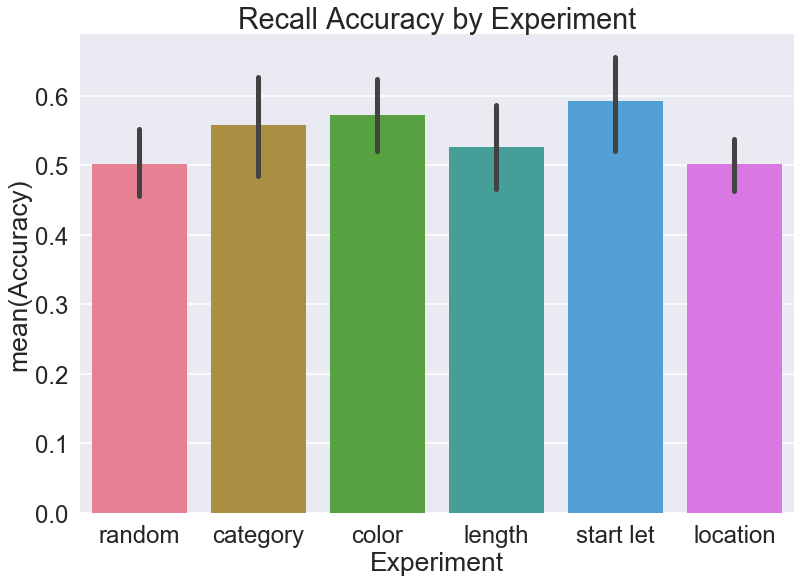

In [9]:
egg_secondhalf = quail.crack_egg(egg_all, lists=range(8,16))
analyzed_egg = quail.analyze(egg_secondhalf, analysis='accuracy', listgroup=['average']*8)

for plot_style in ['bar']:
    quail.plot(analyzed_egg, plot_type='subject', plot_style=plot_style, 
               subjgroup=subjgroup, subjname='Experiment', title='Recall Accuracy by Experiment')

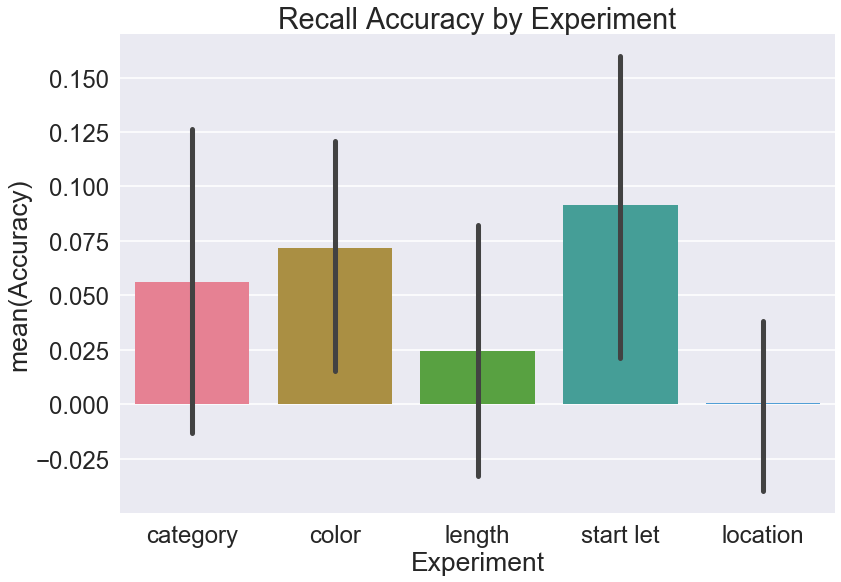

In [10]:
baseline_egg = analyzed_egg - analyzed_egg[0].values[[subj=='random' for subj in subjgroup]].mean()
baseline_egg = baseline_egg.loc[26:]
baseline_egg.analysis_type='accuracy'
subjgroup_baseline = [sub for sub in subjgroup if sub!='random']

quail.plot(baseline_egg, plot_type='subject', plot_style='bar', 
           subjgroup=subjgroup_baseline, subjname='Experiment', title='Recall Accuracy by Experiment')

In [11]:
from scipy.stats import ttest_1samp

for condition in pd.Series(subjgroup_baseline).unique():
    print(condition, ttest_1samp(baseline_egg.iloc[list(np.where([sub==condition for sub in subjgroup_baseline])[0])],0))

('category', Ttest_1sampResult(statistic=array([ 1.51334041]), pvalue=array([ 0.14583617])))
('color', Ttest_1sampResult(statistic=array([ 2.57540417]), pvalue=array([ 0.01853141])))
('length', Ttest_1sampResult(statistic=array([ 0.78724727]), pvalue=array([ 0.43953653])))
('start let', Ttest_1sampResult(statistic=array([ 2.49334197]), pvalue=array([ 0.02204757])))
('location', Ttest_1sampResult(statistic=array([ 0.04220227]), pvalue=array([ 0.96675594])))


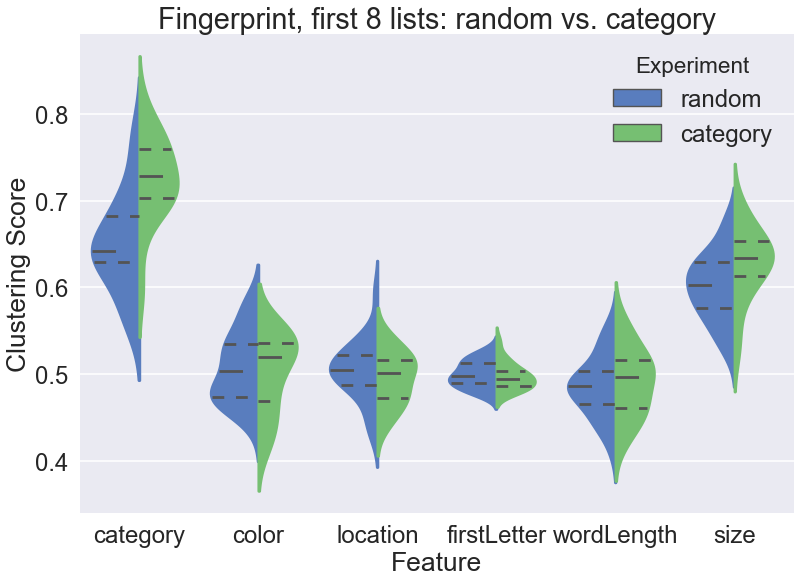

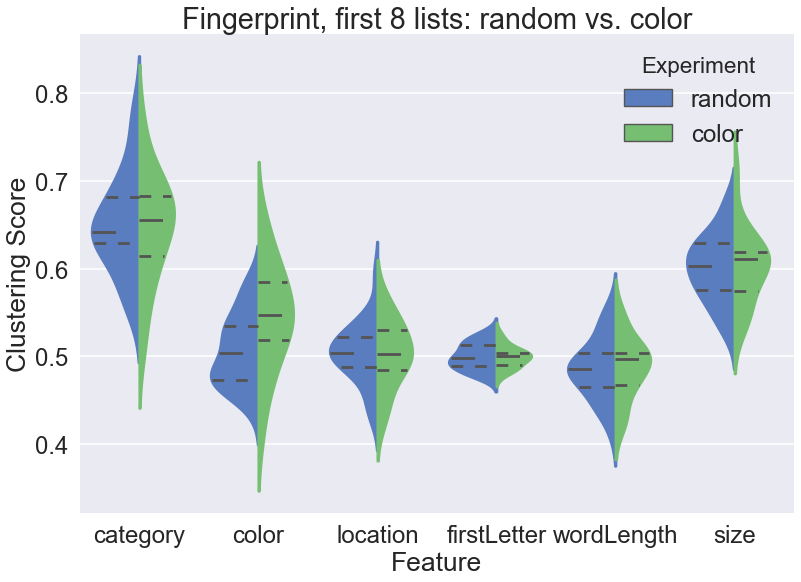

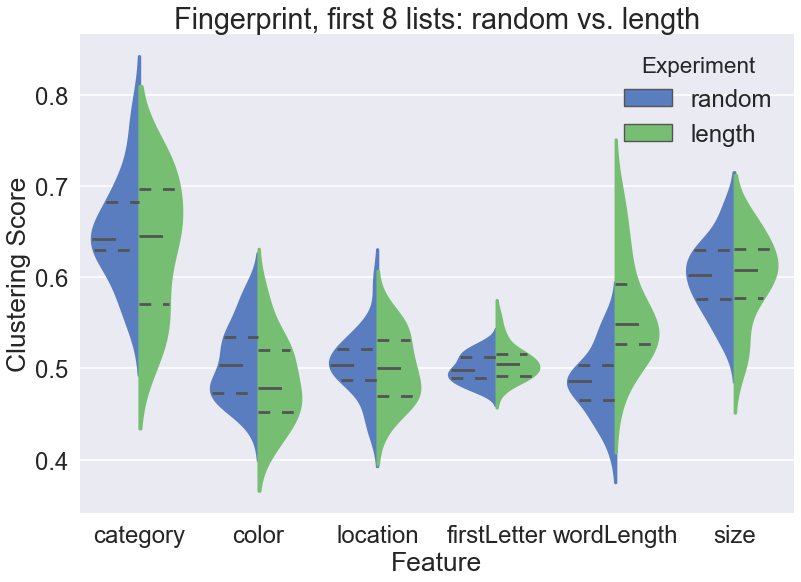

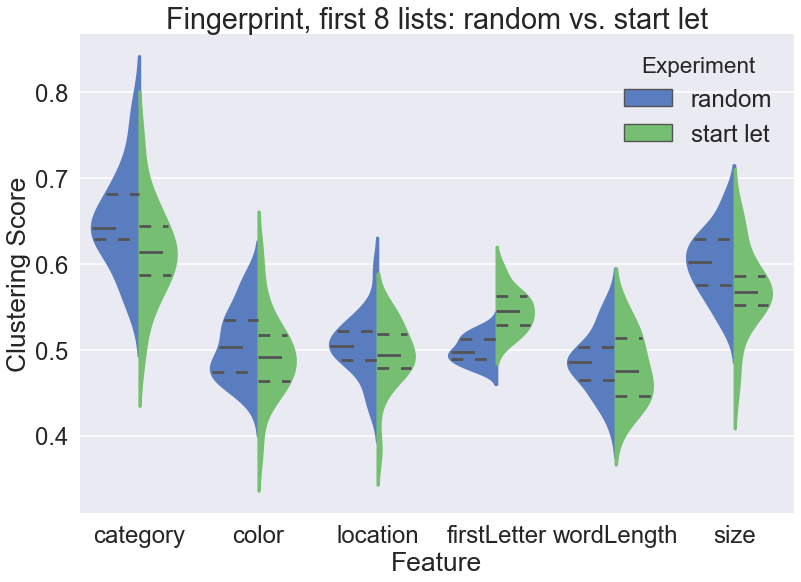

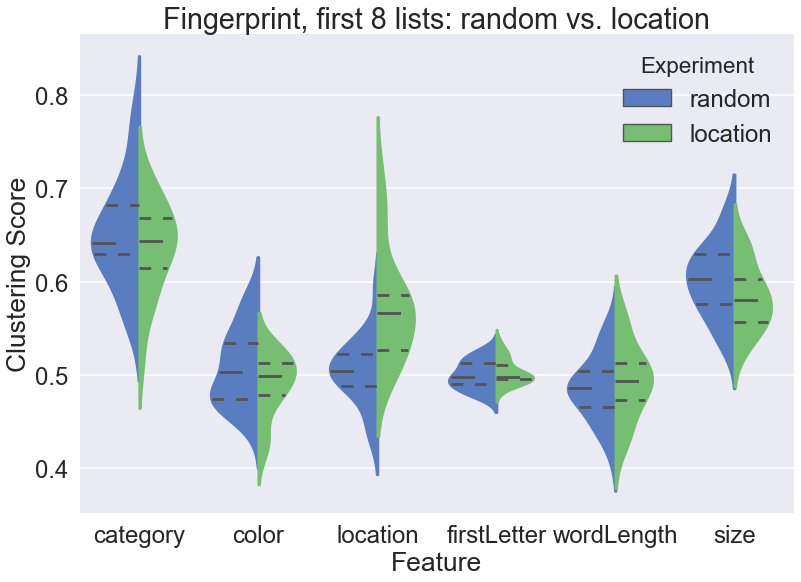

In [14]:
sns.set_palette('muted')

for i in range(1,len(experiment_names)):
    stacked = quail.stack_eggs([eggs[0], eggs[i]])
    stacked_cracked = quail.crack_egg(stacked, lists=range(8))
    subjgroup = []
    for experiment_name, experiment_n in zip([experiment_names[0],experiment_names[i]], [subjnums[0],subjnums[i]]):
        subjgroup+=[experiment_name]*experiment_n 

    analyzed_egg = quail.analyze(stacked_cracked, analysis='fingerprint', listgroup=['average']*8)
    quail.plot(analyzed_egg, plot_type='subject', plot_style='violin', 
           subjgroup=subjgroup, subjname='Experiment', title='Fingerprint, first 8 lists: random vs. ' + experiment_names[i], split=True,
              scale="count", inner="quartile")

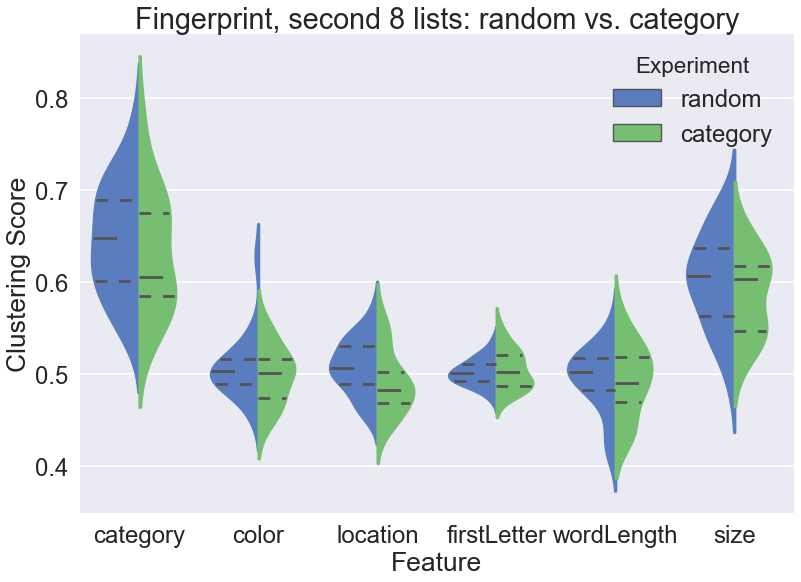

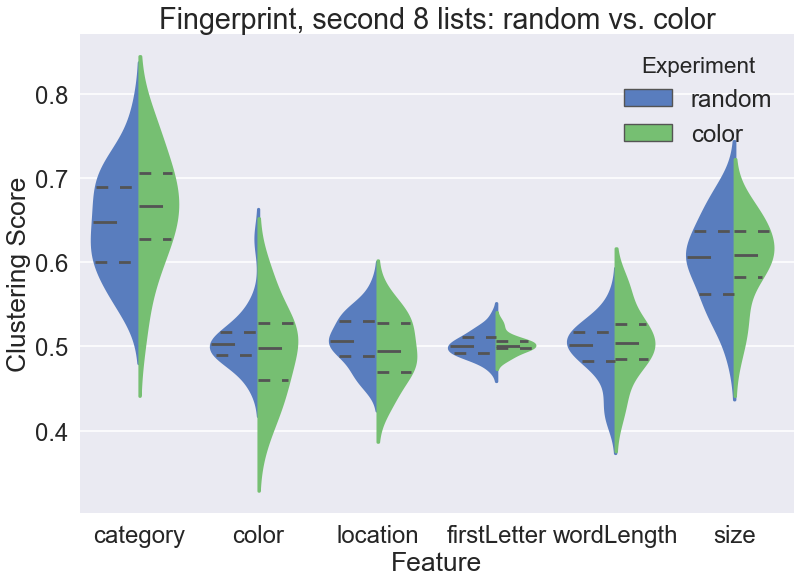

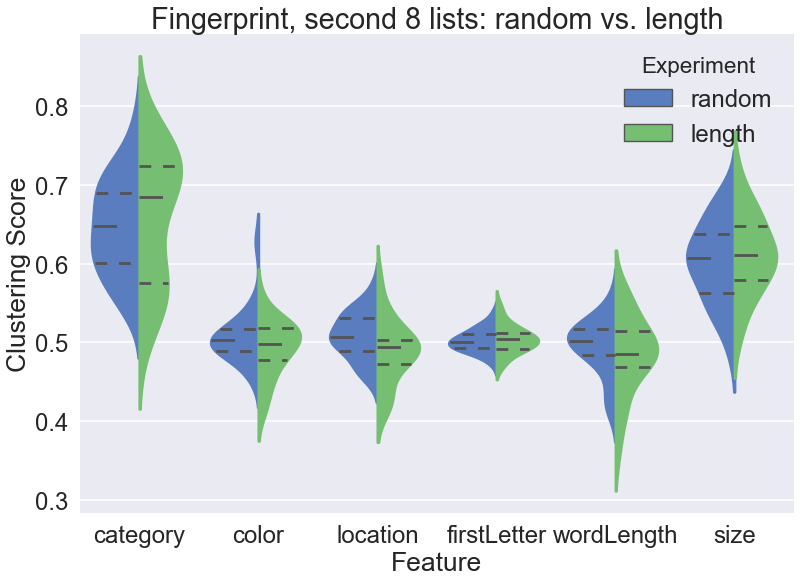

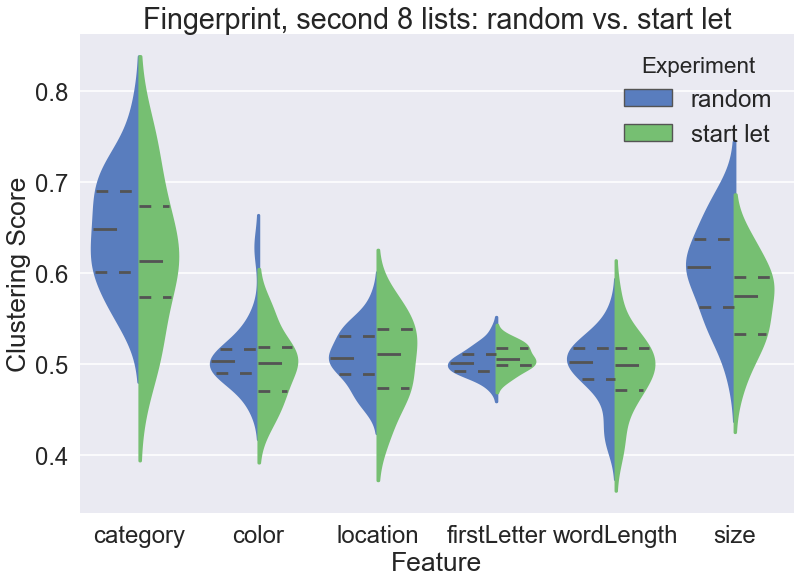

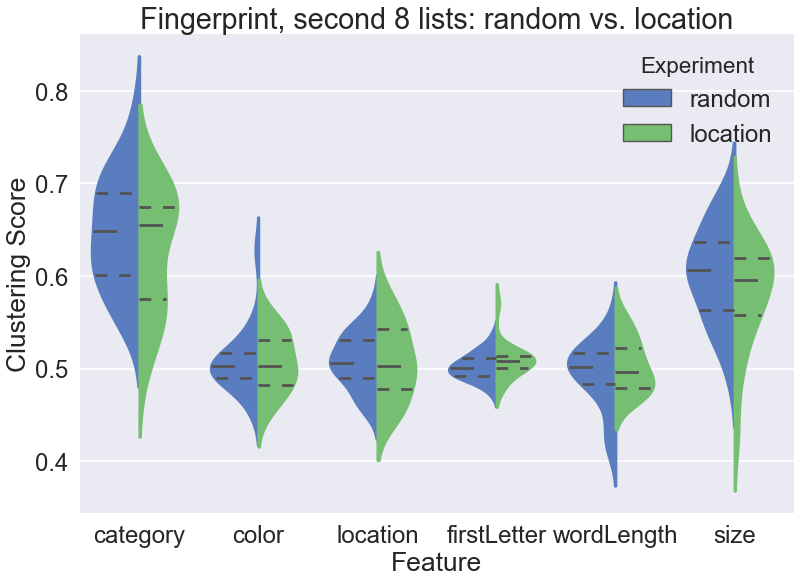

In [16]:
for i in range(1,len(experiment_names)):
    stacked = quail.stack_eggs([eggs[0], eggs[i]])
    stacked_cracked = quail.crack_egg(stacked, lists=range(8,16))
    subjgroup = []
    for experiment_name, experiment_n in zip([experiment_names[0],experiment_names[i]], [subjnums[0],subjnums[i]]):
        subjgroup+=[experiment_name]*experiment_n 

    analyzed_egg = quail.analyze(stacked_cracked, analysis='fingerprint', listgroup=['average']*8)
    quail.plot(analyzed_egg, plot_type='subject', plot_style='violin', 
           subjgroup=subjgroup, subjname='Experiment', title='Fingerprint, second 8 lists: random vs. ' + experiment_names[i], split=True,
              scale="count", inner="quartile")